In [1]:
from pathlib import Path

import datetime
import sys
import scipy
import random
import math

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

import matplotlib as mpl
mpl.rc('text', usetex=False)
#Code for using superscripts
def get_super(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s))
    return x.translate(res)
# function to convert to subscript
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
#Checks to make sure you are in the right folder, if this is wrong reload
import os
print(os.getcwd())


C:\Users\jdnor\Documents\GitHub\SwearerCode


In [60]:
# Choose .csv data file and turn it into dataframe
file_name ='MS_230610_CuRu_SiO2_JDN1_78__JDN2_2NH3.CSV' #set the name of the 

colnames = ["a" , "b", "c", "d", "e","f","g","h","i","j","k","l"] #Defines the column tites for a csv without titles
file = pd.read_csv(file_name, names = colnames) 
df = pd.DataFrame(file)
header_len = int(df.iloc[1,1]) # Gets location of the data in the sheet
columnsnew = df.iloc[header_len + 1, :] #Gets the correct names for the columns
columnsnew = columnsnew.dropna().tolist() #converts to list from dataframe and drops empty cells
print(columnsnew)#Print your column names
file = pd.read_csv(file_name, names = columnsnew) #Reloads csv with correct column names
#Rough code here, not good to load csv twice, can we alter column titles of dataframe without knowing the titles 
df = pd.DataFrame(file)
ms_df = df.iloc[header_len + 2 :] #grabs the data content
ms_df = ms_df.drop(labels = ["Time"], axis = 1) # Gets rid of hour:minute:second column
ms_df = ms_df.astype(float)# makes everything a float
print(ms_df.dtypes)
#converting to minutes rather than milliseconds
ms_df.ms = ms_df.ms/(1000)/60
ms_df = ms_df.rename(columns = {"ms" : "minutes"})
display(ms_df.head())


#Inomplete code for plotting logarithmically ignore for now
logarithmic = False

if logarithmic:
    meatnum = 0
    for colnum in range(len(ms_df.columns)):
        if colnum != 0:
            for rownum in range(ms_df.shape[0]):
                meatnum = ms_df.iloc[rownum, colnum] 
                if meatnum > 0:
                    ms_df.iloc[rownum, colnum] = np.log10(meatnum)
                else:
                    ms_df.iloc[rownum, colnum] = -15
            #display(ms_df.iloc[:,colnum].head())
            #ms_df.iloc[:,colnum] = math.log(ms_df.iloc[:,colnum], 10)
            #display(ms_df.iloc[:,colnum].head())

#Preview of your data to make sure everyting looks good
display(ms_df.head())


['Time', 'ms', 'Argon', 'Ammonia', 'Hydrogen', 'Nitrogen']
ms          float64
Argon       float64
Ammonia     float64
Hydrogen    float64
Nitrogen    float64
dtype: object


,minutes,Argon,Ammonia,Hydrogen,Nitrogen
25,0.246167,-2.382900e-12,6.691300e-12,1.289500e-10,1.865100e-09
26,0.692333,-5.166500e-12,1.265400e-11,1.351700e-10,1.871400e-09
27,1.052100,5.277300e-13,4.854000e-12,1.024300e-10,1.899600e-09
28,1.411867,-3.461200e-12,1.064800e-11,1.285900e-10,1.930400e-09
29,1.771633,-1.417800e-12,-6.981500e-12,1.187000e-10,1.937500e-09


,minutes,Argon,Ammonia,Hydrogen,Nitrogen
25,0.246167,-2.382900e-12,6.691300e-12,1.289500e-10,1.865100e-09
26,0.692333,-5.166500e-12,1.265400e-11,1.351700e-10,1.871400e-09
27,1.052100,5.277300e-13,4.854000e-12,1.024300e-10,1.899600e-09
28,1.411867,-3.461200e-12,1.064800e-11,1.285900e-10,1.930400e-09
29,1.771633,-1.417800e-12,-6.981500e-12,1.187000e-10,1.937500e-09


In [93]:
#Changing/Shifting time axis Run only if you want to do this
ms_df.minutes = ms_df.minutes - #number you want to shift by
ms_df = ms_df.rename(columns = {"ms" : "minutes"})

       minutes      Hydrogen       Ammonia      Nitrogen
3714  457.9524  1.408400e-08  7.855400e-07  2.721800e-09
         minutes      Hydrogen       Ammonia      Nitrogen
3730  460.007533  1.405200e-08  7.778500e-07  2.727500e-09
2.738647058823529e-09


[0.85, 0.91, 0.97, 1.02, 1.08, 1.14, 1.2]
Figure(2000x1000)
Figure(2000x1000)


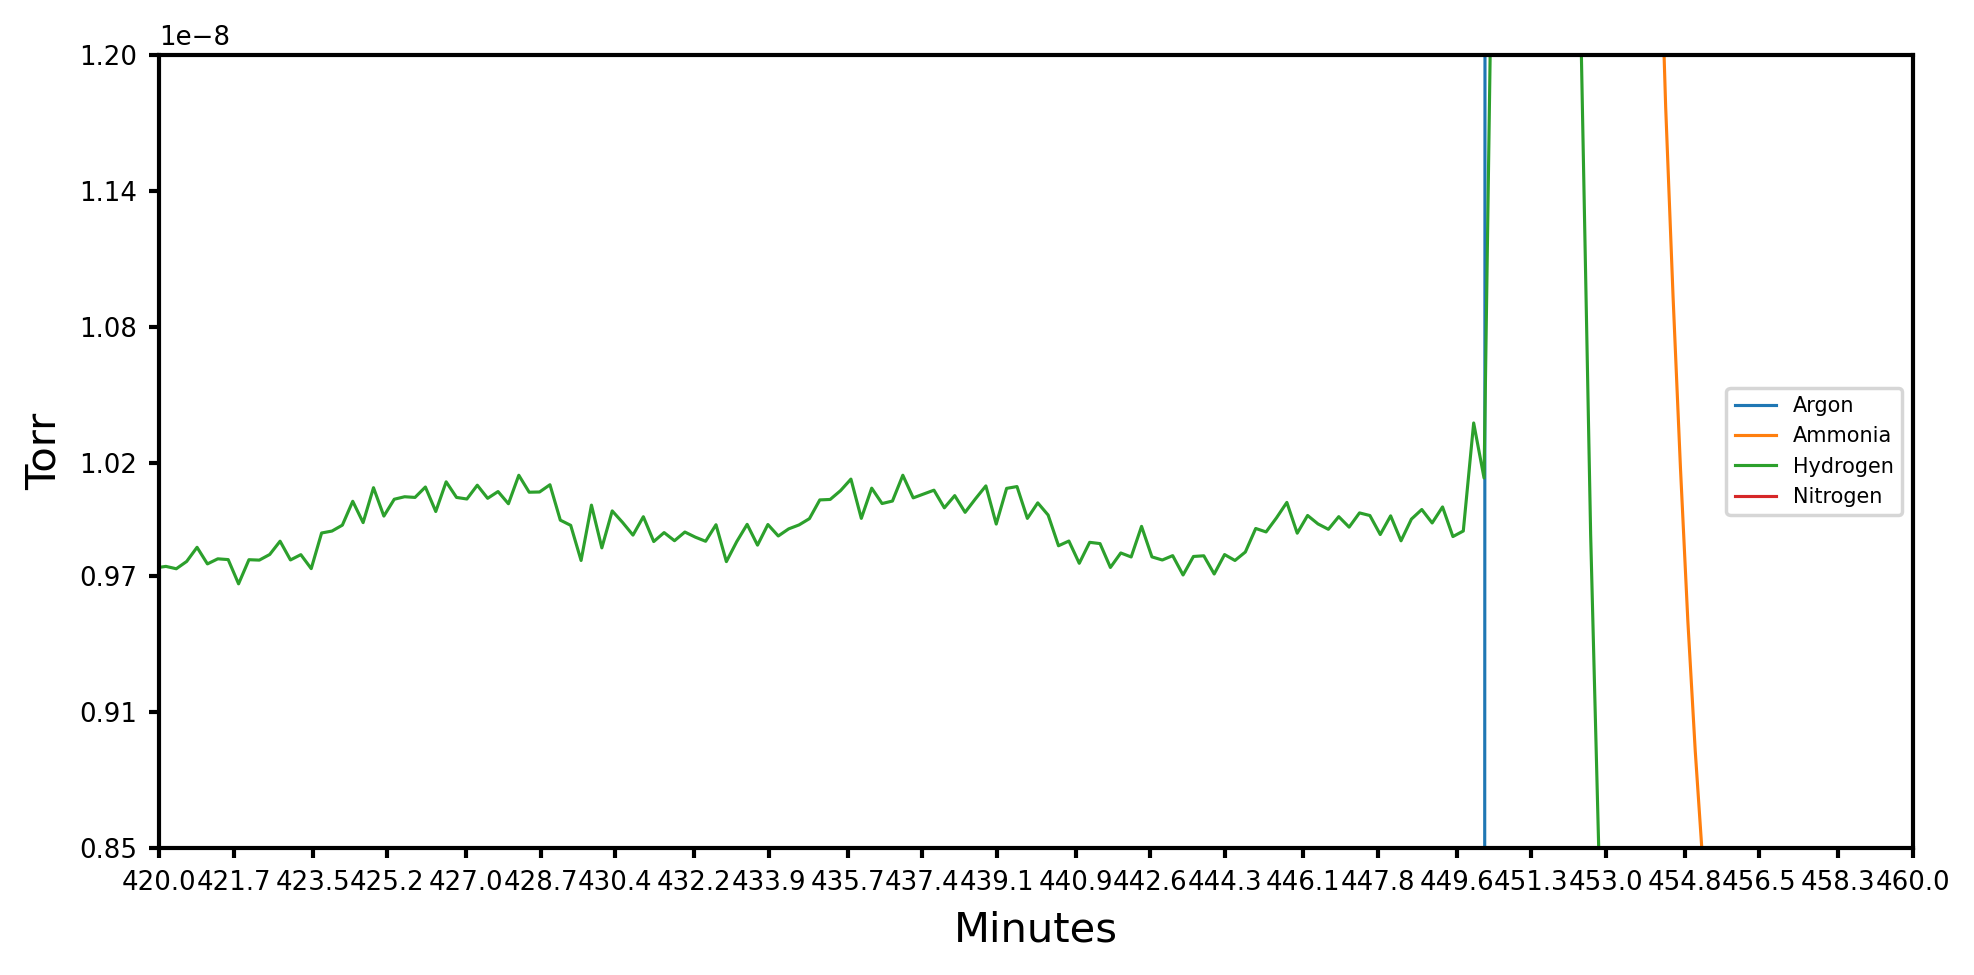

In [82]:
font_size = 1.5
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'DejaVu Sans'
fig,ax = plt.subplots(dpi=250*(1/font_size))
mass = ms_df.set_index('minutes').plot(figsize=(8, 4), linewidth =0.6*font_size, ax = ax)

size = fig.get_size_inches()
if size[0]<=size[1]:
    rgh_size = size[0]
else :  
    rgh_size = size[1]
fig.dpi=1000/rgh_size
#
#
#plt.gca().invert_xaxis()
ypower = -8
yhigh = 1.2
ylow = 0.85

ypoints = 7
ydigits = 2

ylabels = [round(num,ydigits) for num in np.linspace(ylow, yhigh, ypoints)]
if ydigits <= 0:
    ylabels = [int(num) for num in ylabels]
print (ylabels)
for y in range(len(ylabels)):
    ylabels[y] = ylabels[y]*pow(10,ypower)
mass.set_yticks(ylabels)
#mass.set_yticklabels(ylabels)
#mass.set_yticks(range(ylow, yhigh, yfreq)) Old tick setting code only works for integers
#mass.set_yticklabels(range(ylow, yhigh, yfreq)) Old tick setting code
mass.set_ylim(ylow * pow(10,ypower), yhigh* pow(10,ypower))

# Axis labels

mass.set_xlabel("Minutes", fontsize = 8*font_size)
mass.set_ylabel("Torr", fontsize = 8*font_size)


for axis in ['bottom','left']:
    mass.spines[axis].set_linewidth(0.8*font_size)
    mass.spines[axis].set_position(("axes", 0))
for axis in ['top','right']:
    mass.spines[axis].set_visible(True)
    mass.spines[axis].set_linewidth(0.8*font_size)



#print(table_for_plot.columns[1:])
# And adjust length and tkickness of tick marks
mass.tick_params(width = 0.8*font_size, length = 2*font_size)
mass.tick_params(axis='both', which='minor')
plt.xticks(fontsize=5*font_size)
plt.yticks(fontsize=5*font_size)

mass.yaxis.get_offset_text().set_fontsize(5*font_size)
#Legend Control
mass.legend(fontsize = 4*font_size, loc = "center right")

#plt.title('Ammonia CuRu_SiO' + get_sub("2"), fontsize = 120)


mass.yaxis.set_ticks_position('left')
mass.xaxis.set_ticks_position('bottom')
#Adjusting range and tick frequency of x axis

xhigh = 460

xlow = 420
xpoints = 24
xdigits = 1
xlabels = [round(num, xdigits) for num in np.linspace(xlow, xhigh, xpoints)]
if xdigits <= 0:
    xlabels = [int(num) for num in xlabels]

mass.set_xticks(xlabels)
mass.set_xticklabels(xlabels)
mass.set_xlim(xlow, xhigh)


plt.tight_layout()
print(fig)
#Put the name you want for your figure here, it will be saved as "Fig_'Name'" with both a jpg for quick use and an eps for detailed edits.
fig_name = 'MS_230610_CuRu_SiO2_JDN1_78__JDN2_2NH3'
plt.savefig(Path.cwd() / "Plot_{}.jpg".format(fig_name), bbox_inches="tight")

plt.savefig(Path.cwd() / "Plot_{}.pdf".format(fig_name), format="pdf")
print(fig)
plt.show()

In [86]:
#Averaging sections
gas = "Hydrogen" # Gas you want to inspect
Time1 = 446 # Start in min
Time2= 447 # End in min
print(ms_df.iloc[(ms_df['minutes']-Time1).abs().argsort()[:1]])
print(ms_df.iloc[(ms_df['minutes']-Time2).abs().argsort()[:1]])
time1_df = ms_df.iloc[(ms_df['minutes']-Time1).abs().argsort()[:1]].index[0]
time2_df = ms_df.iloc[(ms_df['minutes']-Time2).abs().argsort()[:1]].index[0]

meanofsection = ms_df.loc[time1_df:time2_df,:].loc[:,gas].mean()

print(meanofsection)

       minutes         Argon       Ammonia      Hydrogen      Nitrogen
2184  445.9583  4.961600e-11  7.928500e-07  9.888900e-09  1.936300e-09
       minutes         Argon       Ammonia      Hydrogen      Nitrogen
2188  446.9055  5.691800e-11  7.990000e-07  9.962000e-09  1.925600e-09
9.93086e-09


[7.0, 7.5, 8.0, 8.5, 9.0]
[0.0, 0.05, 0.1, 0.15, 0.2]
Figure(1000x1000)


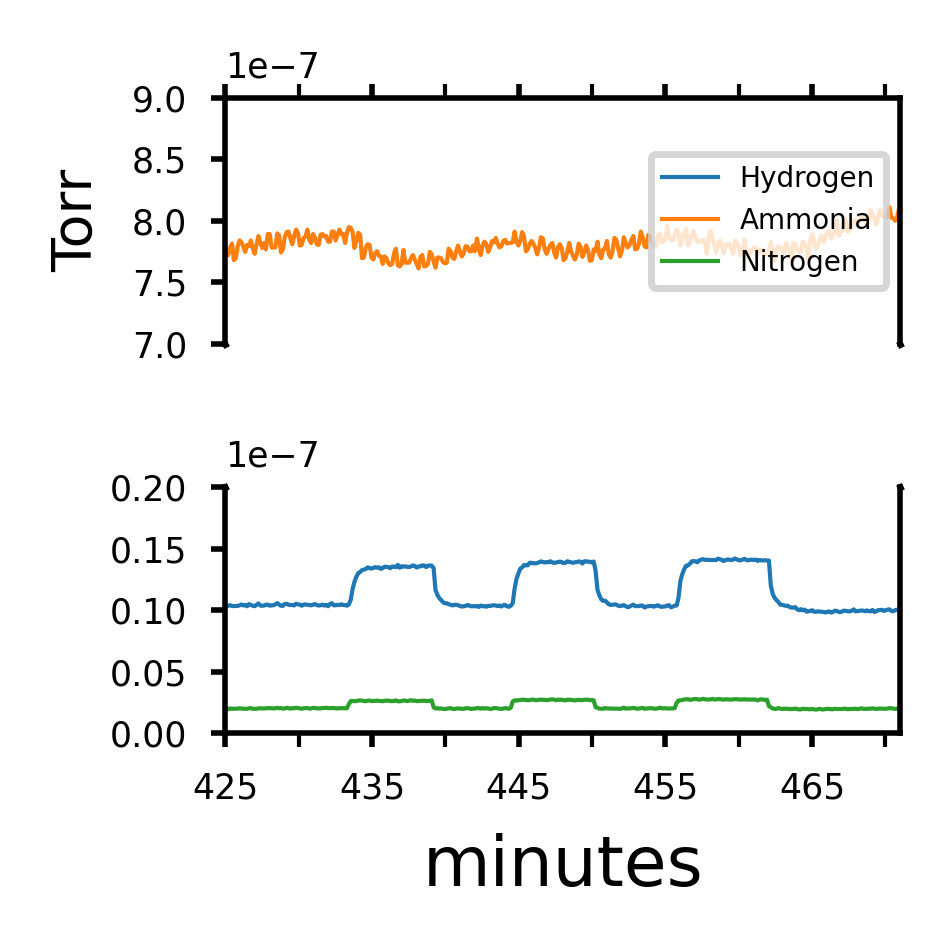

In [12]:
#Split plot code
font_size = 1
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.family'] = 'DejaVu Sans'
fig,(ax1,ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)
mass1 = ms_df.set_index('minutes').plot(figsize=(2, 2), linewidth =0.6*font_size, ax = ax1)
mass2 = ms_df.set_index('minutes').plot(figsize=(2, 2), linewidth =0.6*font_size, ax = ax2)

size = fig.get_size_inches()
if size[0]<=size[1]:
    rgh_size = size[0]
else :  
    rgh_size = size[1]
fig.dpi=1000/rgh_size
#
#
#plt.gca().invert_xaxis()
ypower = -7
ydigits = 2

yhigh1 = 9
ylow1 = 7
ypoints1 = 5

ylabels1 = [round(num,ydigits) for num in np.linspace(ylow1, yhigh1, ypoints1)]
if ydigits <= 0:
    ylabels = [int(num) for num in ylabels1]
print (ylabels1)
for y in range(len(ylabels1)):
    ylabels1[y] = ylabels1[y]*pow(10,ypower)
mass1.set_yticks(ylabels1)

yhigh2 = 0.2
ylow2 = 0
ypoints2 = 5

ylabels2 = [round(num,ydigits) for num in np.linspace(ylow2, yhigh2, ypoints2)]
if ydigits <= 0:
    ylabels = [int(num) for num in ylabels2]
print (ylabels2)
for y in range(len(ylabels2)):
    ylabels2[y] = ylabels2[y]*pow(10,ypower)
mass2.set_yticks(ylabels2)



#mass.set_yticklabels(ylabels)
#mass.set_yticks(range(ylow, yhigh, yfreq)) Old tick setting code only works for integers
#mass.set_yticklabels(range(ylow, yhigh, yfreq)) Old tick setting code
mass1.set_ylim(ylow1 * pow(10,ypower), yhigh1* pow(10,ypower))
mass2.set_ylim(ylow2 * pow(10,ypower), yhigh2* pow(10,ypower))
# Axis labels

mass1.set_xlabel("Minutes", fontsize = 8*font_size)
mass1.set_ylabel("Torr", fontsize = 8*font_size)

for axis in ['bottom','left']:
    mass1.spines[axis].set_linewidth(0.8*font_size)
    mass1.spines[axis].set_position(("axes", 0))
for axis in ['top','right']:
    mass1.spines[axis].set_visible(True)
    mass1.spines[axis].set_linewidth(0.8*font_size)
    
for axis in ['bottom','left']:
    mass2.spines[axis].set_linewidth(0.8*font_size)
    mass2.spines[axis].set_position(("axes", 0))
for axis in ['top','right']:
    mass2.spines[axis].set_visible(True)
    mass2.spines[axis].set_linewidth(0.8*font_size)

# hide the spines between ax and ax2
mass1.spines.bottom.set_visible(False)
mass2.spines.top.set_visible(False)
mass1.xaxis.tick_top()
mass1.tick_params(labeltop=False)  # don't put tick labels at the top
mass2.xaxis.tick_bottom()




#print(table_for_plot.columns[1:])
# And adjust length and tkickness of tick marks
mass1.tick_params(width = 0.8*font_size, length = 2*font_size)
mass1.tick_params(axis='both', which='minor')
mass2.tick_params(width = 0.8*font_size, length = 2*font_size)
mass2.tick_params(axis='both', which='minor')
plt.xticks(fontsize=5*font_size)
plt.yticks(fontsize=5*font_size)
mass1.tick_params(labelsize=5*font_size)
mass2.ticklabel_format(scilimits = (ypower, ypower))

mass1.yaxis.get_offset_text().set_fontsize(5*font_size)
mass2.yaxis.get_offset_text().set_fontsize(5*font_size)
#Legend Control
mass1.legend(fontsize = 4*font_size, loc = "center right")
mass2.get_legend().remove()
#plt.title('Ammonia CuRu_SiO' + get_sub("2"), fontsize = 120)


mass2.yaxis.set_ticks_position('left')
mass2.xaxis.set_ticks_position('bottom')
mass1.yaxis.set_ticks_position('left')

#Adjusting range and tick frequency of x axis
xhigh = 471
xlow = 425
xfreq = 10

mass1.set_xticks(range(xlow, xhigh, xfreq))
mass1.set_xticklabels(range(xlow, xhigh, xfreq))
mass1.set_xlim(xlow, xhigh)

mass2.set_xticks(range(xlow, xhigh, xfreq))
mass2.set_xticklabels(range(xlow, xhigh, xfreq))
mass2.set_xlim(xlow, xhigh)


plt.tight_layout()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=0.8*font_size,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
mass1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
mass2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

#Put the name you want for your figure here, it will be saved as "Fig_'Name'" with both a jpg for quick use and an eps for detailed edits.
fig_name = 'MS_230510_Ammonia_CuRuMgOAl2O3_split'
plt.savefig(Path.cwd() / "Plot_{}.jpg".format(fig_name), bbox_inches="tight")

plt.savefig(Path.cwd() / "Plot_{}.pdf".format(fig_name), format="pdf")
print(fig)
plt.show()